**Split the data**

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), which provides a couple of additional features.

First, there is a random_state parameter that allows you to set the random generator seed. Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels.

In [1]:
# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
df_house = pd.read_csv('housing.csv')

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_house, test_size=0.2, random_state=42)

In [4]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [5]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


So far we have considered purely random sampling methods. This is generally fine if the dataset is large enough (especially relative to the number of attributes), but if it is not, will face the risk of introducing a significant sampling bias.

Suppose median_income is a very important attribute to predict median housing prices. We want to ensure that the test set is representative of the various categories of incomes in the whole dataset.

Since the median_income is a continuous numerical attribute, we first need to create an income category attribute.

<AxesSubplot:>

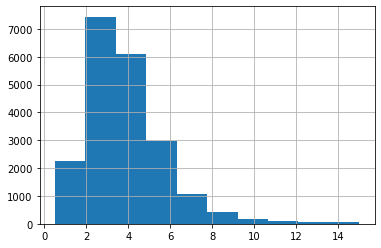

In [6]:
df_house["median_income"].hist()

In [7]:
pd.cut(df_house["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf])

0        (6.0, inf]
1        (6.0, inf]
2        (6.0, inf]
3        (4.5, 6.0]
4        (3.0, 4.5]
            ...    
20635    (1.5, 3.0]
20636    (1.5, 3.0]
20637    (1.5, 3.0]
20638    (1.5, 3.0]
20639    (1.5, 3.0]
Name: median_income, Length: 20640, dtype: category
Categories (5, interval[float64]): [(0.0, 1.5] < (1.5, 3.0] < (3.0, 4.5] < (4.5, 6.0] < (6.0, inf]]

In [8]:
df_house["income_cat"] = pd.cut(df_house["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [9]:
df_house["income_cat"].value_counts().sort_index()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64

<AxesSubplot:>

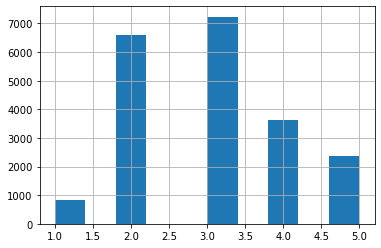

In [10]:
df_house["income_cat"].hist()

The stratify within train_test_split offers an option for stratified sampling.

In [11]:
strat_train_set, strat_test_set = train_test_split(df_house, test_size=0.2, random_state=42, 
                                         stratify = df_house["income_cat"])

We can also use Scikit-Learn’s StratifiedShuffleSplit to realize stratified sampling.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_house, df_house["income_cat"]):
    strat_train_set1 = df_house.loc[train_index]
    strat_test_set1 = df_house.loc[test_index]

we can take a look at the comparison of stratified sampling and random sampling.

In [13]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [14]:
train_set, test_set = train_test_split(df_house, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df_house),
    "Stratified": income_cat_proportions(strat_test_set), # train_test_split
    "Stratified1": income_cat_proportions(strat_test_set1), #StratifiedShuffleSplit
    "Random": income_cat_proportions(test_set),
}).sort_index()

In [15]:
compare_props.head()

,Overall,Stratified,Stratified1,Random
1,0.039826,0.039729,0.039729,0.040213
2,0.318847,0.318798,0.318798,0.324370
3,0.350581,0.350533,0.350533,0.358527
4,0.176308,0.176357,0.176357,0.167393
5,0.114438,0.114583,0.114583,0.109496


In [16]:
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Stratified1,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.114583,0.109496,-4.318374,0.127011


In [17]:
df_house["income_cat"].value_counts() / len(df_house)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [18]:
# remove the income_cat attribute so the data is back to its original
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\janar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Gain insights**

In [19]:
train = strat_train_set.copy()

In [20]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


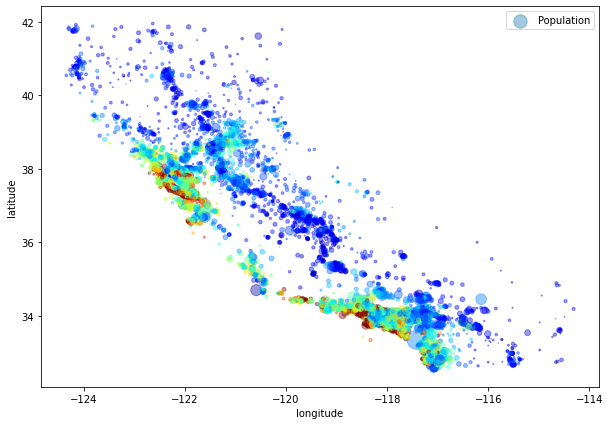

In [21]:
ax = train.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=train['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )

In [22]:
#import matplotlib.image as mpimg

#california_img = mpimg.imread("california_png")

#ax = train.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       #s=train['population']/100, label="Population",
                       #c="median_house_value", cmap=plt.get_cmap("jet"),
                       #colorbar=False, alpha=0.4,
                      #)
#plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           #cmap=plt.get_cmap("jet"))
#plt.ylabel("Latitude", fontsize=14)
#plt.xlabel("Longitude", fontsize=14)

#prices = train["median_house_value"]
#tick_values = np.linspace(prices.min(), prices.max(), 11)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#cbar.set_label('Median House Value', fontsize=16)

#plt.legend(fontsize=16)
#plt.show()

In [23]:
%%time
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_house,shuffle = True, test_size = 0.25, random_state=17)
train=train.copy()
test=test.copy()
print(train.shape)
print(test.shape)

(15480, 11)
(5160, 11)
Wall time: 4.02 ms


In [24]:
train['median_house_value_log']=np.log1p(train['median_house_value'])
test['median_house_value_log']=np.log1p(test['median_house_value'])

In [25]:
max_house_age=train['housing_median_age'].max()

train['age_clipped']=train['housing_median_age']==max_house_age
test['age_clipped']=test['housing_median_age']==max_house_age

<AxesSubplot:>

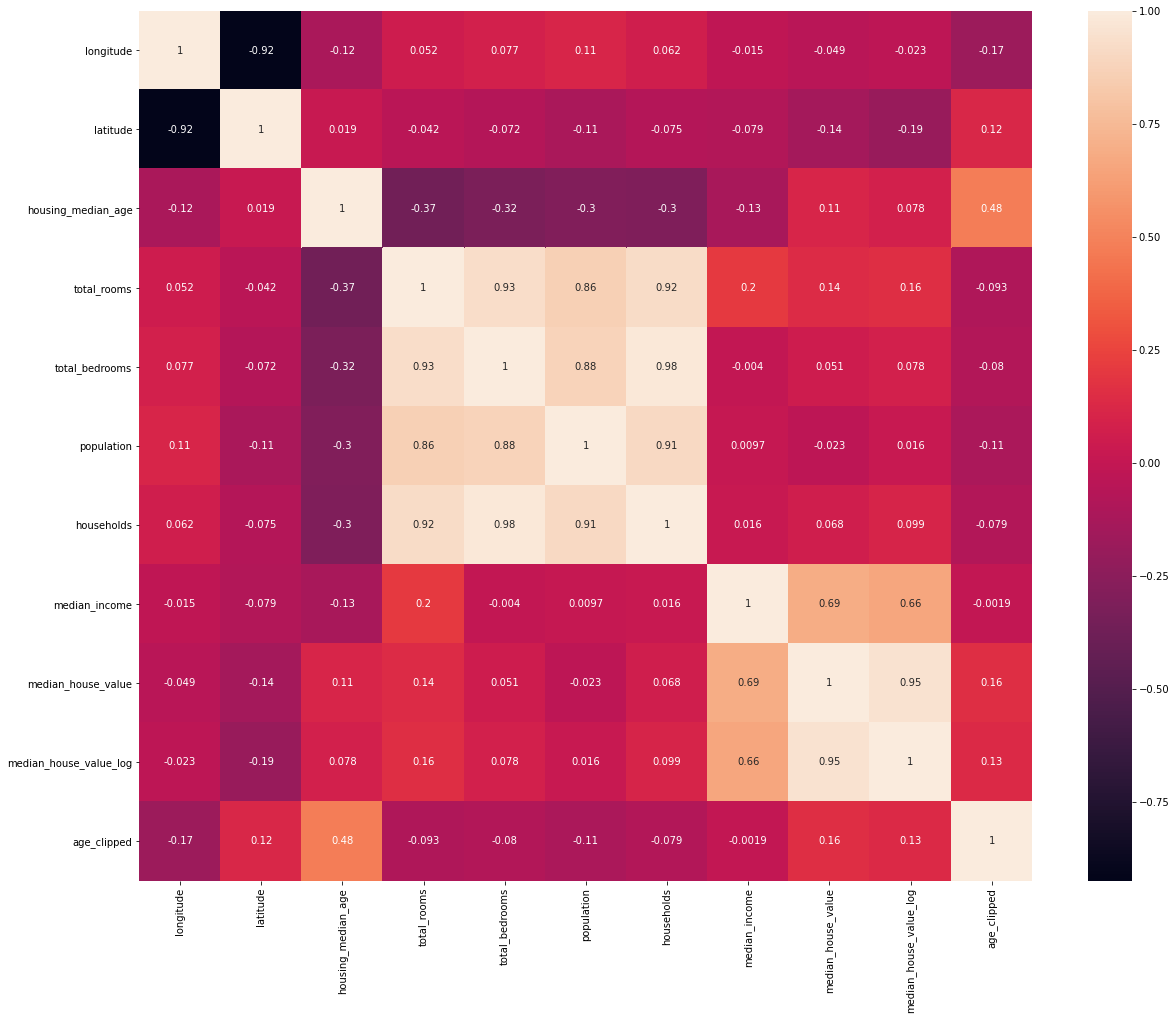

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_y = pd.DataFrame(train).corr()
plt.rcParams['figure.figsize'] = (20, 16)  # Размер картинок
sns.heatmap(corr_y, 
            xticklabels=corr_y.columns.values,
            yticklabels=corr_y.columns.values, annot=True)

The most promising attribute to predict the median_house value is the median income.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

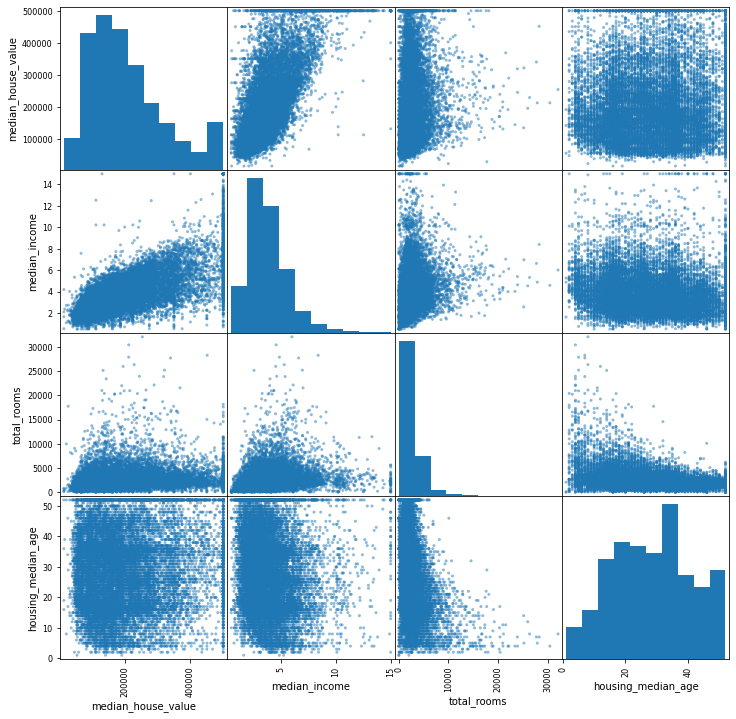

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(train[attributes], figsize=(12, 12))

(0.0, 16.0, 0.0, 550000.0)

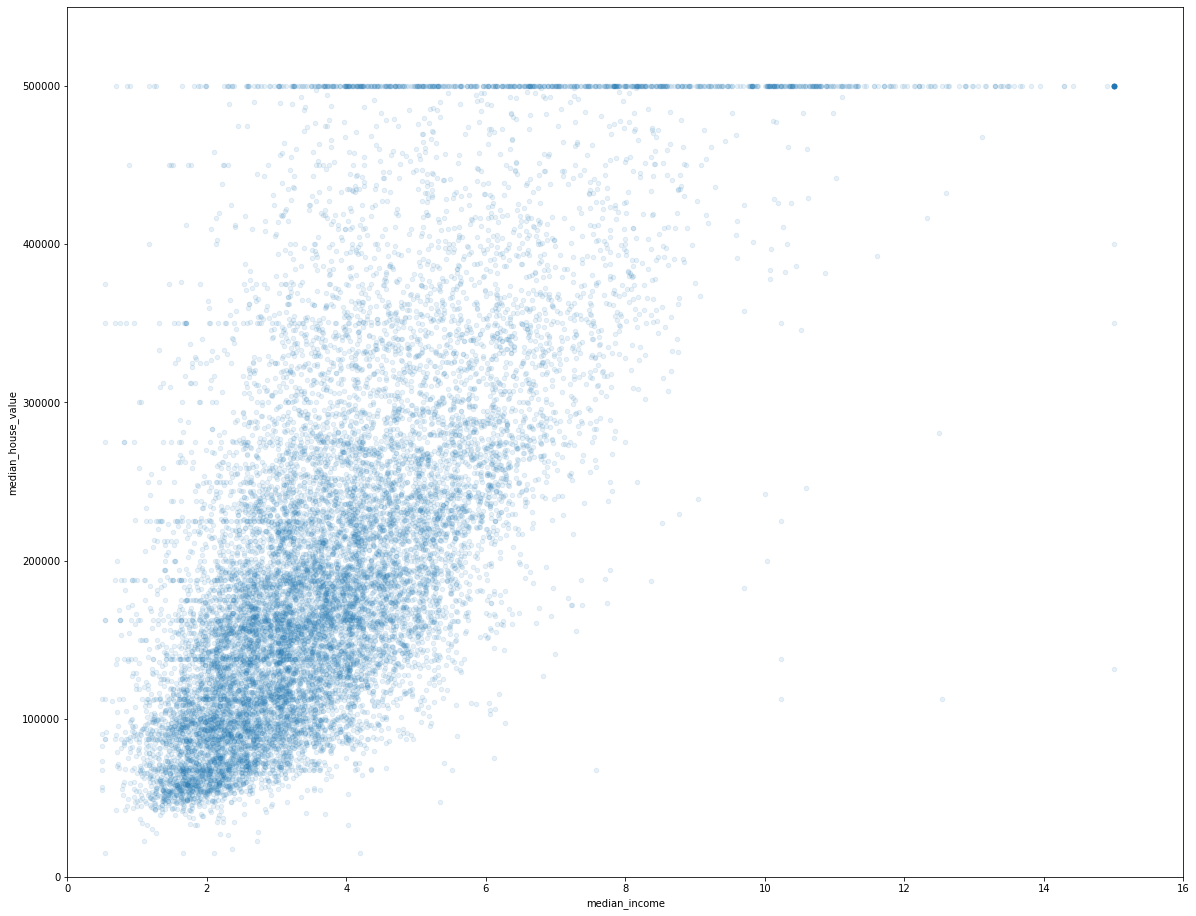

In [28]:
train.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

This plot reveals a few things.

First, the correlation is indeed very strong: upward trend can be clearly seen, and the points are not too dispersed.
Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this plot reveals other less obvious straight lines: a horizontal line around 450,000, another around 350,000, perhaps one around 280,000, and a few more below that.
We may want to try removing the corresponding districts to prevent algorithms from learning to reproduce these data quirks.

In [29]:
predictors = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

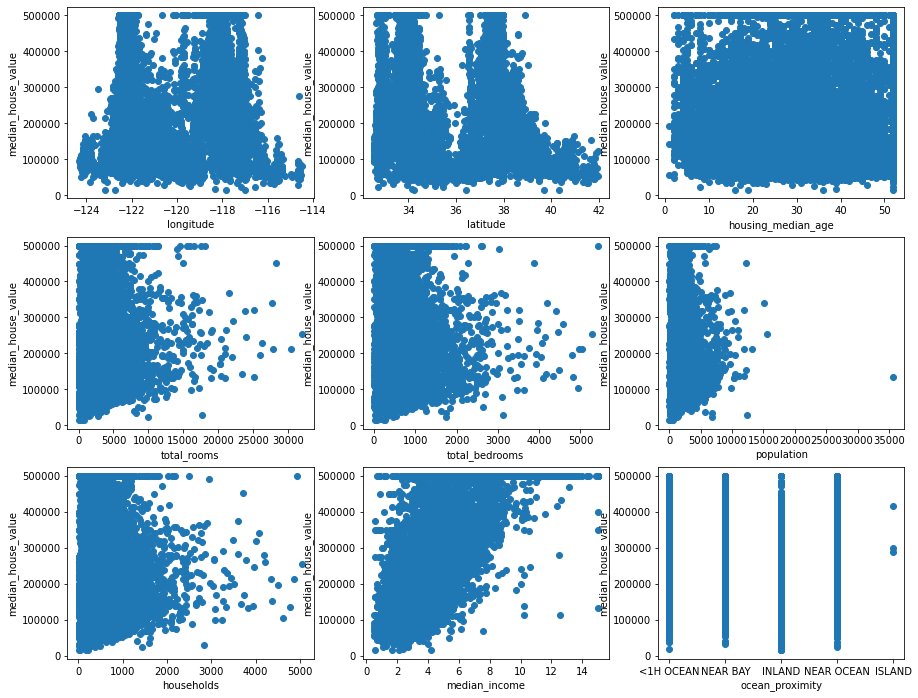

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i in range(0, 3):
    for j in range(0, 3):
        axes[i, j].scatter(train[predictors[i*3+j]], train['median_house_value'])
        axes[i, j].set_xlabel(predictors[i*3+j])
        axes[i, j].set_ylabel('median_house_value')

Attribute Combinations
One more thing you to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations.

For example, the total number of rooms in a district is not very useful if we don’t know how many households there are. What we really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: we probably want to compare it to the number of rooms.
The population per household also seems like an interesting attribute combination to look at.

In [31]:
train["rooms_per_household"] = train["total_rooms"]/train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"]=train["population"]/train["households"]

# let’s look at the correlation matrix again
corr_matrix = train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_house_value_log      0.948606
median_income               0.687799
age_clipped                 0.157550
rooms_per_household         0.146740
total_rooms                 0.137242
housing_median_age          0.107610
households                  0.067523
total_bedrooms              0.050753
population_per_household   -0.021721
population                 -0.022655
longitude                  -0.049128
latitude                   -0.142381
bedrooms_per_room          -0.258685
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house value than the total_rooms or total_bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The rooms_per_household is also more informative than total_rooms in a district—obviously the larger the houses, the more expensive they are.

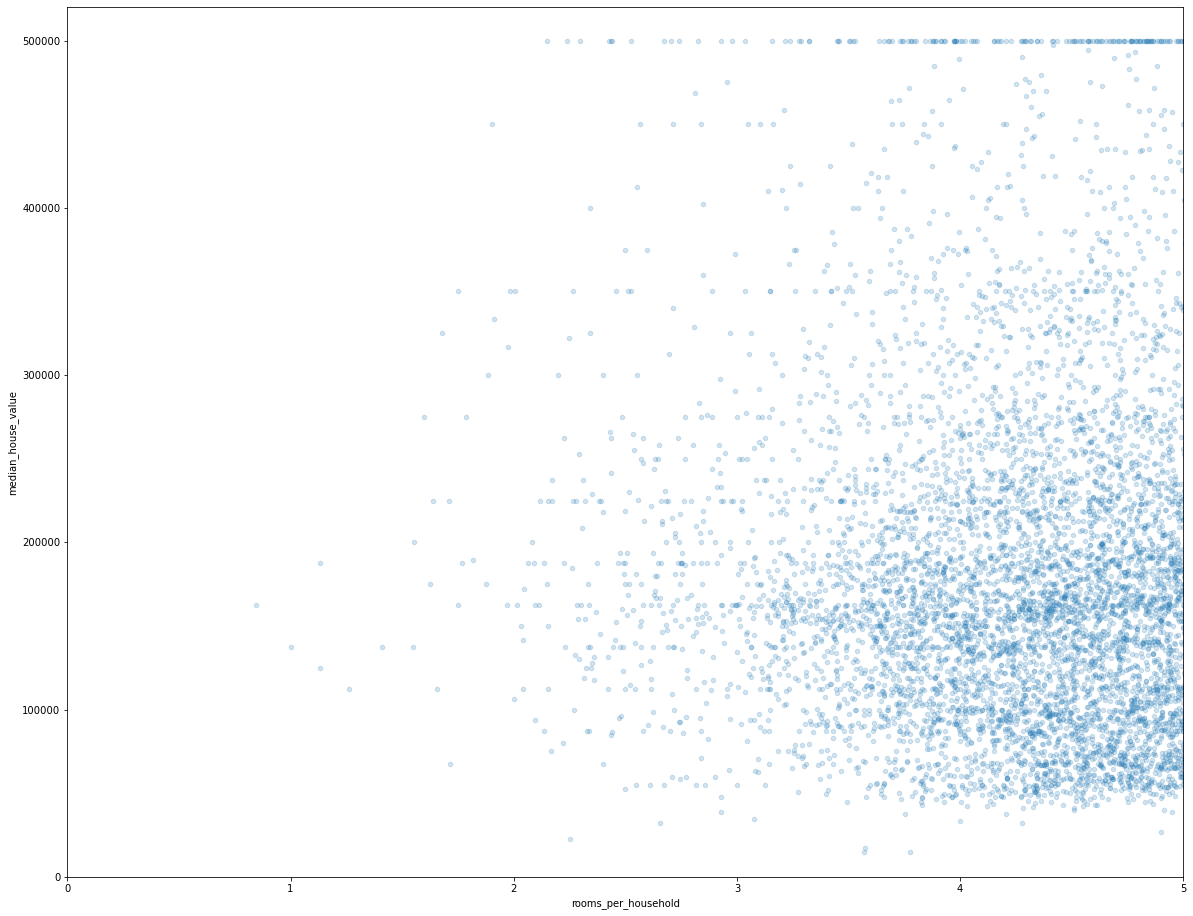

In [32]:
train.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [33]:
train.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_log,rooms_per_household,bedrooms_per_room,population_per_household
count,15480.000000,15480.000000,15480.000000,15480.00000,15330.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15330.000000,15480.000000
mean,-119.573557,35.636937,28.673256,2637.47177,536.281018,1422.857364,498.022610,3.883162,207066.410724,12.085829,5.447263,0.212407,3.115928
std,2.007366,2.141362,12.627921,2157.77458,416.009316,1120.156668,378.993113,1.912431,115618.405834,0.569111,2.553991,0.057939,11.980823
min,-124.350000,32.550000,1.000000,2.00000,2.000000,3.000000,2.000000,0.499900,14999.000000,9.615805,0.846154,0.100000,0.692308
25%,-121.810000,33.930000,18.000000,1452.00000,296.000000,786.000000,279.000000,2.567225,119600.000000,11.691916,4.452249,0.174910,2.429279
50%,-118.510000,34.260000,29.000000,2134.00000,434.000000,1164.000000,408.000000,3.543050,179900.000000,12.100162,5.248523,0.202773,2.818313
75%,-118.007500,37.720000,37.000000,3149.25000,647.000000,1725.000000,606.000000,4.766400,265100.000000,12.487866,6.068533,0.239173,3.279918
max,-114.470000,41.950000,52.000000,32054.00000,5419.000000,35682.000000,5050.000000,15.000100,500001.000000,13.122367,141.909091,1.000000,1243.333333


**Data preparation for Machine Learning algorithms**

It’s time to prepare the data for Machine Learning algorithms. Instead of doing this manually, we should write functions for this purpose, for several good reasons:

This will allow reproduce these transformations easily on any dataset (e.g., the next time get a fresh dataset).
We can gradually build a library of transformation functions that you can reuse in future projects.
We can use these functions in your live system to transform the new data before feeding it to ML algorithms.

In [34]:
# revert to a clean training set 
# separate the predictors and the labels
train = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
train_labels = strat_train_set["median_house_value"].copy()

**Data Cleaning**

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. We saw earlier that the total_bedrooms attribute has some missing values, so let’s fix this with three options:

Get rid of the corresponding districts.
Get rid of the whole attribute.
Set the values to some value (zero, the mean, the median, etc.).
We can accomplish these easily using DataFrame’s dropna(), drop(), and fillna().

In [35]:
def option_for_NA(df, col_name = "total_bedrooms", option=3):
    if option == 1:
        return df.dropna(subset=[col_name])
    elif option == 2:
        return df.drop(col_name, axis=1)
    elif option == 3:
        median = df[col_name].median()
        df[col_name].fillna(median, inplace=True) 
        return df

If choose option 3, DO NOT forget to save the median value computed. We will need it later to replace missing values in the test set when evaluate the system, and also once the system goes live to replace missing values in new data.

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.



In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Remove the text attribute because median can only be calculated on numerical attributes
train_num = train.drop("ocean_proximity", axis=1)

# fit the imputer instance to the training data
imputer.fit(train_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. It is usually safer to apply the imputer to all the numerical attributes.

In [37]:
# Check this is the same as manually computing the median of each attribute
imputer.statistics_ == train_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

Transform the training set with imputer.

In [38]:
imputer.strategy

'median'

In [39]:
X = imputer.transform(train_num)

train_tr = pd.DataFrame(X, columns=train_num.columns,
                          index=train_num.index)
train_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


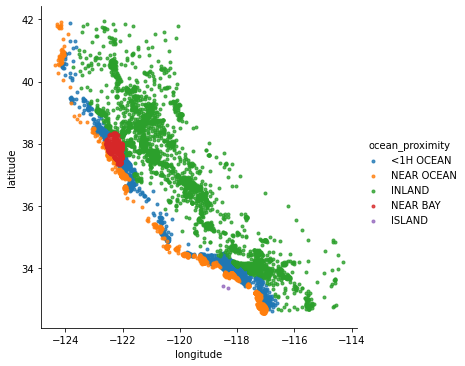

In [40]:
sns.lmplot('longitude', 'latitude', data=train,markers ='.', hue='ocean_proximity', fit_reg=False, height=5)
plt.show()

Now we better undersand the meaning of different classes. Let's look at the data.

In [41]:
value_count=train['ocean_proximity'].value_counts()
value_count

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

C:\Users\janar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Ocean Proximity')

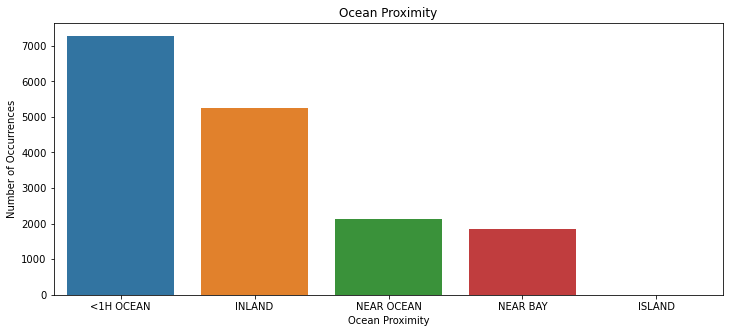

In [47]:
import seaborn 
plt.figure(figsize=(12,5))


sns.barplot(value_count.index, value_count.values)
plt.title('Ocean Proximity')
plt.ylabel('Number of Occurrences')
plt.xlabel('Ocean Proximity')

#plt.figure(figsize=(12,5))
#plt.title('House Value depending on Ocean Proximity')
#sns.boxplot(x="ocean_proximity", y="median_house_value_log", data=df_house)